In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import datetime
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


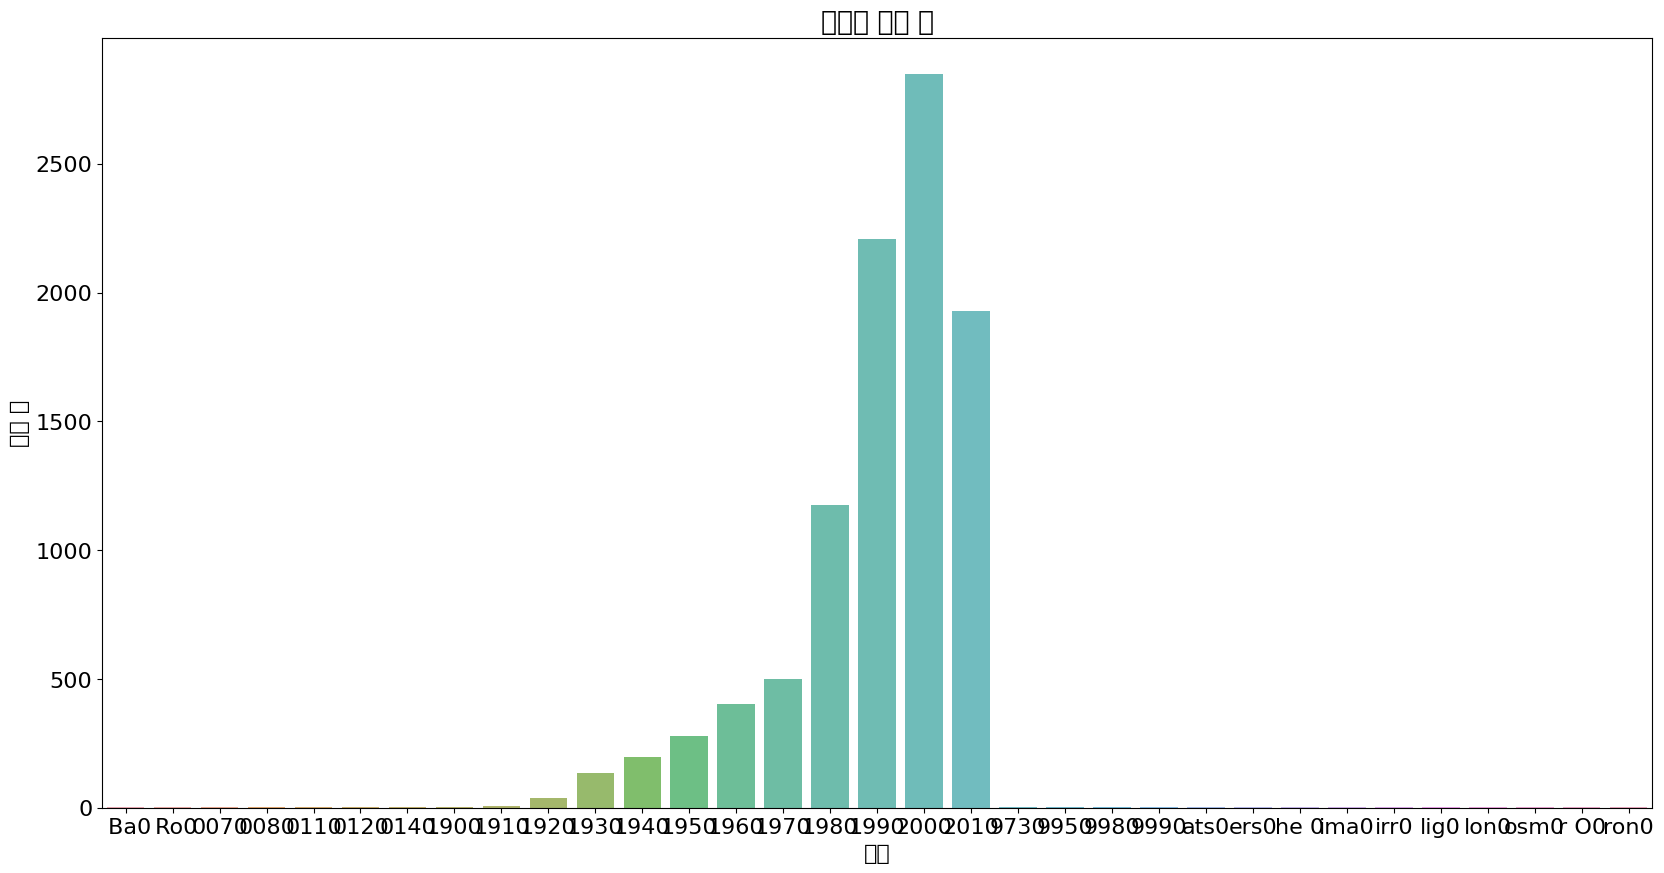

In [57]:
movie_data = pd.read_csv("/content/drive/MyDrive/대외활동/동아리/투빅스/9주차/movies.csv", header=0)
movie_data.columns = ["movie_id", "title", "genre"]
movie_data

a1 = movie_data["title"].apply(lambda x : x[-5:-1])
movie_data["year"] = a1
movie_data
movie_data["year_term"] = movie_data["title"].apply(lambda x : x[-5 :-2] + "0")
movie_year_term = movie_data["year_term"].value_counts().sort_index()

sns.barplot(x=movie_year_term.index, y=movie_year_term.values, alpha=0.8)
plt.title("연대별 영화 수")
plt.xlabel("연대")
plt.ylabel("영화 수")
plt.show()


In [51]:
movie_data["genre"].value_counts()
unique_genre_dict = {}

for row in movie_data['genre'] :
    parsed_genre = row.split("|")
    for genre_name in parsed_genre :
        if (genre_name in unique_genre_dict) == False :
        	unique_genre_dict[genre_name] = 1
        else :
        	unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1

unique_genre_dict

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

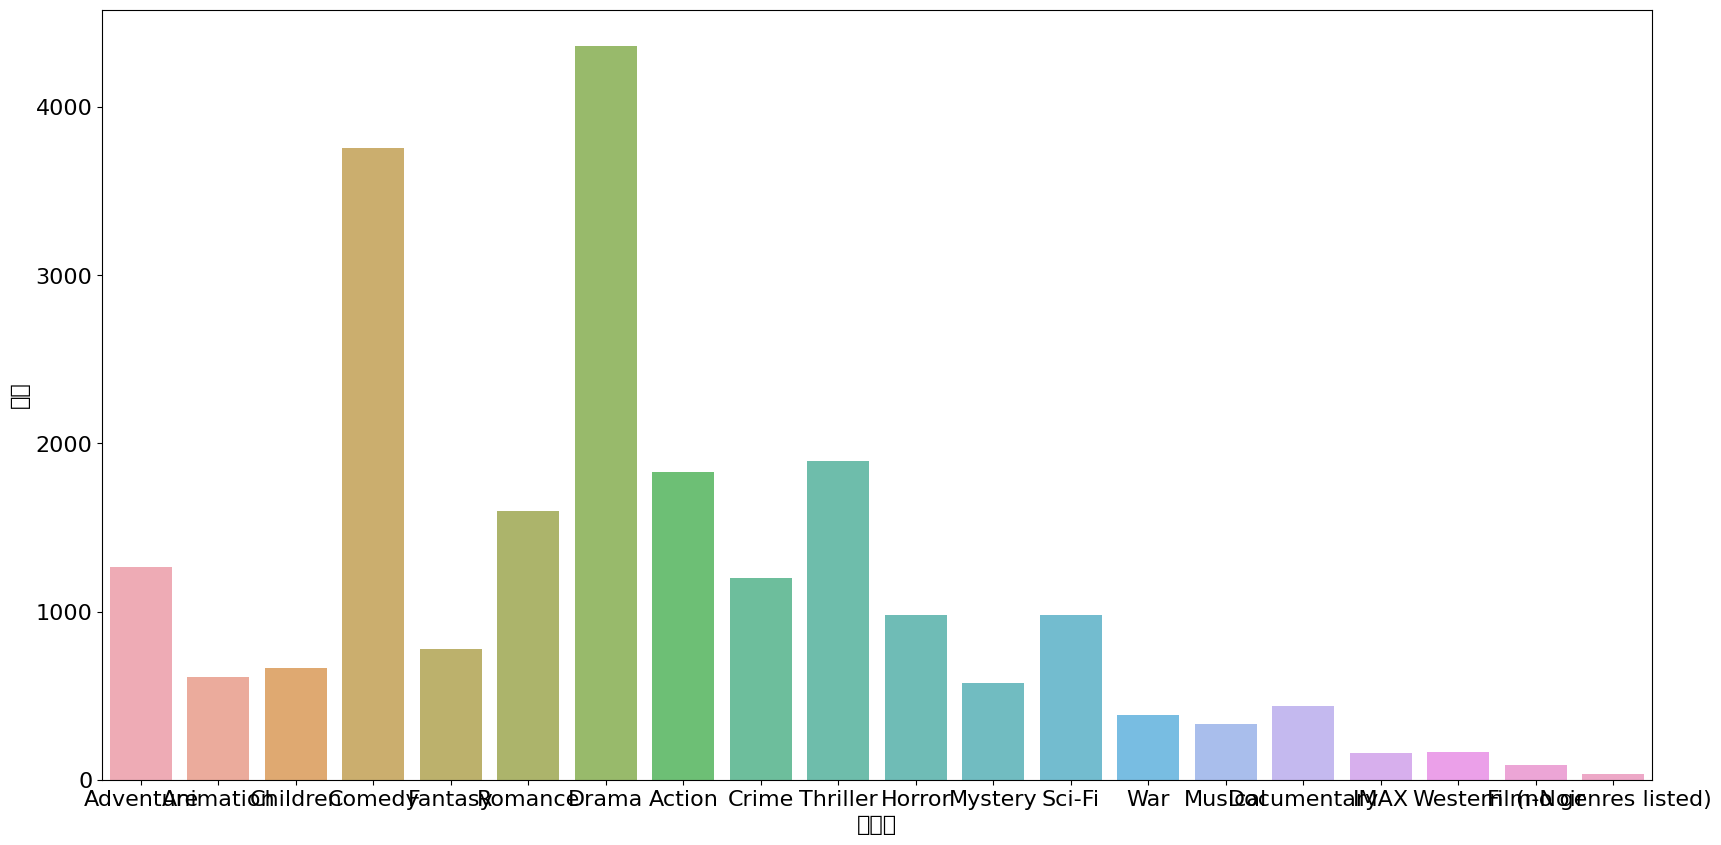

In [56]:
x_data = list(unique_genre_dict.keys())
y_data = list(unique_genre_dict.values())
sns.barplot(x=x_data, y=y_data, alpha=0.8)
plt.xlabel("영화수")
plt.ylabel("장르")
plt.show()

In [11]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156233 sha256=3c6d56c491dba65f32abe35b1594a2cf360ba8fbf44efe6951faa6340f7dc8fb
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [28]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/대외활동/동아리/투빅스/9주차/ratings.csv')
ratings.to_csv('/content/drive/MyDrive/대외활동/동아리/투빅스/9주차/ratings_surprise.csv', index=False, header=False)

from surprise import Reader
from surprise.model_selection import train_test_split

reader = Reader(line_format='user item rating timestamp', sep=',',
               rating_scale=(0.5, 5))
data = Dataset.load_from_file('/content/drive/MyDrive/대외활동/동아리/투빅스/9주차/ratings_surprise.csv',reader=reader)
train, test = train_test_split(data, test_size=0.25,
                              random_state=42)

In [29]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
train, test = train_test_split(data, test_size=0.25,
                              random_state=42)

# SVD 행렬 분해 알고리즘으로 SVD객체 생성 후 학습 수행
algo = SVD()
algo.fit(train)

In [30]:
prediction = algo.test(test)
print('prediction type: ', type(prediction),
     'size: ', len(prediction))
print()
print('prediction 결과값 5개 미리보기')
print(prediction[:5])

prediction type:  <class 'list'> size:  25000

prediction 결과값 5개 미리보기
[Prediction(uid='391', iid='591', r_ui=4.0, est=3.6245244035494917, details={'was_impossible': False}), Prediction(uid='181', iid='1291', r_ui=1.0, est=1.2862598721592537, details={'was_impossible': False}), Prediction(uid='637', iid='268', r_ui=2.0, est=2.4413152260615214, details={'was_impossible': False}), Prediction(uid='332', iid='451', r_ui=5.0, est=3.7526107104269695, details={'was_impossible': False}), Prediction(uid='271', iid='204', r_ui=4.0, est=3.7392194630058087, details={'was_impossible': False})]


In [31]:
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]
print(result)

[('391', '591', 3.6245244035494917), ('181', '1291', 1.2862598721592537), ('637', '268', 2.4413152260615214), ('332', '451', 3.7526107104269695), ('271', '204', 3.7392194630058087)]


In [32]:
uid = str(214)
iid = str(606)
pred = algo.predict(uid, iid)
print(pred)

user: 214        item: 606        r_ui = None   est = 4.20   {'was_impossible': False}


In [33]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs':[20,40], 'n_factors':[50, 100,200]}

grid = GridSearchCV(SVD, param_grid=param_grid,
                   measures=['rmse','mae'], cv=3)
grid.fit(data)
print(grid.best_score['rmse'])
print(grid.best_params['rmse'])

0.9433556159309905
{'n_epochs': 20, 'n_factors': 50}


In [35]:
from surprise.dataset import DatasetAutoFolds
from surprise.dataset import Reader
from surprise import SVD

reader = Reader(line_format='user item rating timestamp', sep=',',
               rating_scale=(0.5, 5))

data_folds = DatasetAutoFolds(ratings_file='ratings_surprise.csv',
                             reader=reader)

trainset = data_folds.build_full_trainset()
algo = SVD(n_factors=50, n_epochs=20, random_state=42)
algo.fit(trainset)

movies = pd.read_csv('/content/drive/MyDrive/대외활동/동아리/투빅스/9주차/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/대외활동/동아리/투빅스/9주차/ratings.csv')
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('user id=9인 사람은 movie id=42에 대한 평점이 없음')

print(movies[movies['movieId']==42])

def get_unseen_surprise(ratings, movies, userId):
    seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()
    total_movies = movies['movieId'].tolist()
    unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
    print(f'{userId}번 유저가 본 영화 수: {len(seen_movies)}\n추천한 영화 개수: {len(unseen_movies)}\n전체 영화수: {len(total_movies)}')

    return unseen_movies

def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    def sortkey_est(pred):
        return pred.est
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions = predictions[:top_n]
    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_ratings = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [(ids, rating, title) for ids, rating, title in zip(top_movie_ids, top_movie_ratings, top_movie_titles)]
    return top_movie_preds

unseen_lst = get_unseen_surprise(ratings, movies, 9)
top_movies_preds = recomm_movie_by_surprise(algo, 9, unseen_lst,
                                           top_n=10)
print()
print('#'*8,'Top-10 추천영화 리스트','#'*8)

for top_movie in top_movies_preds:
    print('* 추천 영화 이름: ', top_movie[2])
    print('* 해당 영화의 예측평점: ', top_movie[1])
    print()

user id=9인 사람은 movie id=42에 대한 평점이 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama
9번 유저가 본 영화 수: 46
추천한 영화 개수: 9696
전체 영화수: 9742

######## Top-10 추천영화 리스트 ########
* 추천 영화 이름:  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
* 해당 영화의 예측평점:  4.322402915230925

* 추천 영화 이름:  Philadelphia Story, The (1940)
* 해당 영화의 예측평점:  4.172423325516417

* 추천 영화 이름:  Rear Window (1954)
* 해당 영화의 예측평점:  4.160378620971996

* 추천 영화 이름:  His Girl Friday (1940)
* 해당 영화의 예측평점:  4.100292470156684

* 추천 영화 이름:  Boot, Das (Boat, The) (1981)
* 해당 영화의 예측평점:  4.095329442967445

* 추천 영화 이름:  Seventh Seal, The (Sjunde inseglet, Det) (1957)
* 해당 영화의 예측평점:  4.063138824378056

* 추천 영화 이름:  Boogie Nights (1997)
* 해당 영화의 예측평점:  4.062524326115693

* 추천 영화 이름:  Life Is Beautiful (La Vita è bella) (1997)
* 해당 영화의 예측평점:  4.049268225445741

* 추천 영화 이름:  Guess Who's Coming to Dinner (1967)
* 해당 영화의 예측평점:  4.04578027089272

* 추천 영화 이름:

---

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0425


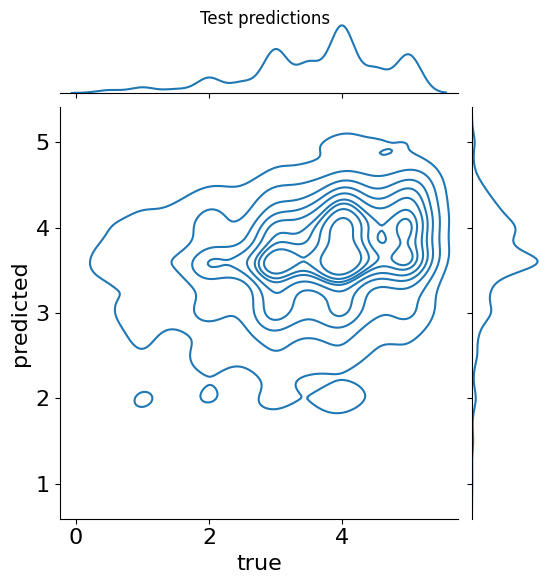

In [38]:
import sys
import random
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import operator
import requests
from zipfile import ZipFile

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/대외활동/동아리/투빅스/9주차/ratings.csv')
df=df[0:20000]
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[['userId','movieId','rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Use the KNNBasic algorithm to train the model
algo = KNNBasic()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]
data=pd.DataFrame(columns=["true","predicted"])
data["true"]=true_ratings
data["predicted"]=est_ratings
g = sns.jointplot(data=data,x="true", y="predicted", kind="kde",)
g.fig.suptitle('Test predictions',fontsize=12)
plt.show()